In [1]:
import sys, numpy as np, pandas as pd
print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)


Python: 3.13.7 (v3.13.7:bcee1c32211, Aug 14 2025, 19:10:51) [Clang 16.0.0 (clang-1600.0.26.6)]
NumPy: 2.3.2
Pandas: 2.3.1


# 🚀 Benim İlk Notebook'um
Bugün Python ortamını test ettim.  
- [x] Python sürümünü gördüm  
- [x] NumPy çalıştı  
- [x] Pandas çalıştı


# 0. Ortam Testi
Python ve temel kütüphaneleri test ediyoruz.


In [2]:
import sys, numpy as np, pandas as pd
print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)


Python: 3.13.7 (v3.13.7:bcee1c32211, Aug 14 2025, 19:10:51) [Clang 16.0.0 (clang-1600.0.26.6)]
NumPy: 2.3.2
Pandas: 2.3.1


# 1. Veri Setini İndirme
NLTK kütüphanesinden movie_reviews veri setini indiriyoruz.



In [3]:
import nltk
nltk.download("movie_reviews")


[nltk_data] Error loading movie_reviews: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


False

In [4]:
import nltk
nltk.download("movie_reviews")


[nltk_data] Error loading movie_reviews: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


False

In [5]:
import nltk
nltk.download("movie_reviews")


[nltk_data] Error loading movie_reviews: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


False

In [6]:
import nltk
nltk.download("movie_reviews", download_dir="/tmp/nltk_data")


[nltk_data] Error loading movie_reviews: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


False

In [2]:
import nltk
nltk.download("movie_reviews")


ModuleNotFoundError: No module named 'nltk'

In [3]:
import nltk, ssl, certifi
ssl_ctx = ssl.create_default_context(cafile=certifi.where())
nltk.download("movie_reviews", context=ssl_ctx)


TypeError: Downloader.download() got an unexpected keyword argument 'context'

In [4]:
# 1) SSL'i certifi ile global ayarla (güvenli kök sertifikaları kullan)
import ssl, certifi
def _certifi_https_context(*args, **kwargs):
    return ssl.create_default_context(cafile=certifi.where())
ssl._create_default_https_context = _certifi_https_context

# 2) Şimdi NLTK indir
import nltk
nltk.download("movie_reviews")

# 3) Doğrula
from nltk.corpus import movie_reviews
print("Toplam yorum:", len(movie_reviews.fileids()))


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/rabiaceylan/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Toplam yorum: 2000


In [5]:
from nltk.corpus import movie_reviews
import pandas as pd

# 2000 yorumun kimlikleri
fileids = movie_reviews.fileids()

# Her yorumu tek bir string haline getir
texts  = [" ".join(movie_reviews.words(fid)) for fid in fileids]

# Her yorumun etiketi (pos/neg)
labels = [movie_reviews.categories(fid)[0] for fid in fileids]

# İki sütunlu tablo
df = pd.DataFrame({"text": texts, "label": labels})

# İlk 5 satıra göz at
df.head()


ModuleNotFoundError: No module named 'pandas'

In [7]:
from nltk.corpus import movie_reviews
import pandas as pd

# 2000 yorumun kimlikleri
fileids = movie_reviews.fileids()

# Her yorumu tek bir string haline getir
texts  = [" ".join(movie_reviews.words(fid)) for fid in fileids]

# Her yorumun etiketi (pos/neg)
labels = [movie_reviews.categories(fid)[0] for fid in fileids]

# İki sütunlu tablo
df = pd.DataFrame({"text": texts, "label": labels})

# İlk 5 satıra göz at
df.head()


,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard ' s quick movie review damn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' first...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

print("Eğitim veri sayısı:", len(X_train))
print("Test veri sayısı:", len(X_test))


ModuleNotFoundError: No module named 'sklearn'

In [9]:
import sklearn, matplotlib
print("sklearn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)


sklearn: 1.7.1
matplotlib: 3.10.5


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

print("Eğitim veri sayısı:", len(X_train))
print("Test veri sayısı:", len(X_test))


Eğitim veri sayısı: 1600
Test veri sayısı: 400


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Basit temizlikleri TF-IDF kendi yapsın diye:
# - lowercase=True  -> hepsini küçük harfe indirir
# - stop_words='english' -> the, is, and... gibi kelimeleri atar
# - ngram_range=(1,2) -> tek kelime + iki kelime kalıpları
# - max_features=20000 -> en sık/önemli 20k özelliği tut
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2),
    max_features=20000
)

# Sadece eğitim verisiyle öğren (fit), sonra hem train hem test'i dönüştür (transform)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

X_train_vec.shape, X_test_vec.shape


((1600, 20000), (400, 20000))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur:
# - solver='liblinear'  : ikili sınıflandırmada sağlam bir çözücü
# - max_iter=1000       : yeterince yineleme hakkı ver
clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Eğit (sadece sayısal vektörleri ve etiketleri veriyoruz)
clf.fit(X_train_vec, y_train)

# Test üzerinde tahmin yap
y_pred = clf.predict(X_test_vec)

# Temel skorlar
acc = accuracy_score(y_test, y_pred)
print("Doğruluk (accuracy):", round(acc, 4))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk (accuracy): 0.805

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         neg       0.83      0.77      0.80       200
         pos       0.79      0.84      0.81       200

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.80       400



In [13]:
import numpy as np

def predict_sentiment(text: str):
    """
    Tek bir yorumu alır, TF-IDF'e dönüştürür, modelle tahmin eder.
    Çıktı: etiket (pos/neg) ve olasılıklar.
    """
    vec = tfidf.transform([text])          # metni sayılara çevir
    proba = clf.predict_proba(vec)[0]      # [prob_neg, prob_pos] (sıra, clf.classes_ ile eşleşir)
    pred  = clf.predict(vec)[0]            # 'pos' veya 'neg'
    # Olasılıkları sınıf adına göre yakala
    classes = list(clf.classes_)
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return pred, p_pos, p_neg

# Hızlı test
print(predict_sentiment("I absolutely loved this movie, brilliant acting!"))
print(predict_sentiment("Worst plot ever. Boring and predictable."))


('pos', 0.5149, 0.4851)
('neg', 0.097, 0.903)


Matplotlib is building the font cache; this may take a moment.


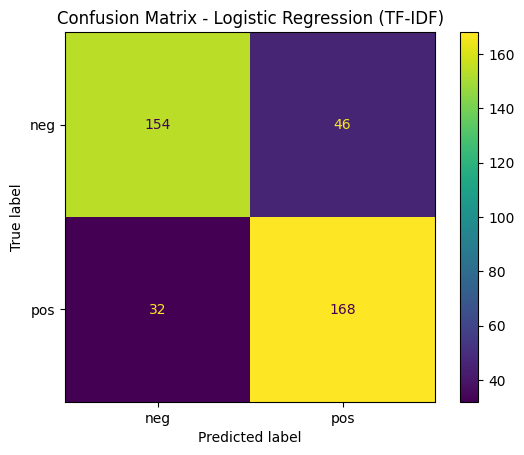

TN (neg doğru): 154, FP (neg->pos hata): 46
FN (pos->neg hata): 32, TP (pos doğru): 168


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Zaten y_pred var; yoksa tekrar üret:
# y_pred = clf.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=["neg", "pos"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["neg", "pos"])
disp.plot()
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN (neg doğru): {tn}, FP (neg->pos hata): {fp}")
print(f"FN (pos->neg hata): {fn}, TP (pos doğru): {tp}")


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def try_config(tfidf_kwargs, C=1.0, note=""):
    tfidf2 = TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1,2),
        max_features=20000,
        **tfidf_kwargs
    )
    Xtr = tfidf2.fit_transform(X_train)
    Xt  = tfidf2.transform(X_test)

    clf2 = LogisticRegression(solver="liblinear", max_iter=1000, C=C, random_state=42)
    clf2.fit(Xtr, y_train)
    pred = clf2.predict(Xt)
    acc  = accuracy_score(y_test, pred)
    print(f"{note:25s} | acc={acc:.4f}")
    return acc, tfidf2, clf2, pred

trials = []
trials.append(try_config({"sublinear_tf": True}, C=1.0, note="sublinear_tf"))
trials.append(try_config({"sublinear_tf": True, "min_df": 2}, C=1.0, note="min_df=2"))
trials.append(try_config({"sublinear_tf": True, "min_df": 2, "max_df": 0.9}, C=1.0, note="min_df=2,max_df=0.9"))
trials.append(try_config({"sublinear_tf": True, "min_df": 2, "max_df": 0.9}, C=2.0, note="... + C=2.0"))
trials.append(try_config({"sublinear_tf": True, "min_df": 5, "max_df": 0.9}, C=2.0, note="min_df=5,C=2.0"))


sublinear_tf              | acc=0.8475
min_df=2                  | acc=0.8450
min_df=2,max_df=0.9       | acc=0.8450
... + C=2.0               | acc=0.8450
min_df=5,C=2.0            | acc=0.8525


In [16]:
# En yüksek acc'yi bul
best_i = max(range(len(trials)), key=lambda i: trials[i][0])
best_acc, tfidf, clf, y_pred = trials[best_i]
print("Seçilen ayarların doğruluğu:", round(best_acc, 4))


Seçilen ayarların doğruluğu: 0.8525


In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [18]:
import numpy as np

proba = clf.predict_proba(tfidf.transform(X_test))
classes = list(clf.classes_)  # ['neg','pos']
p_neg = proba[:, classes.index('neg')]
p_pos = proba[:, classes.index('pos')]
margin = np.abs(p_pos - p_neg)
print("Çok kararsız örnek sayısı (margin < 0.1):", (margin < 0.1).sum())


Çok kararsız örnek sayısı (margin < 0.1): 56


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# En iyi TF-IDF ayarlarımız
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),
    max_features=20000,
    sublinear_tf=True,
    min_df=5,
    max_df=0.9,
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

# En iyi LR ayarı
clf = LogisticRegression(solver="liblinear", max_iter=1000, C=2.0, random_state=42)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print("Final accuracy:", round(acc, 4))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Final accuracy: 0.8525

Classification report:
               precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



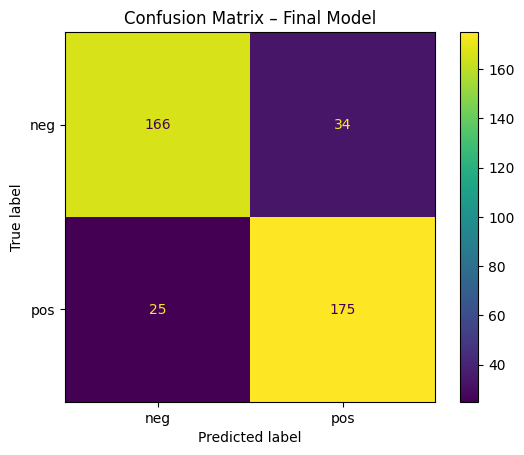

TN (neg doğru): 166, FP (neg→pos hata): 34
FN (pos→neg hata): 25, TP (pos doğru): 175


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["neg","pos"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["neg","pos"])
disp.plot()
plt.title("Confusion Matrix – Final Model")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN (neg doğru): {tn}, FP (neg→pos hata): {fp}")
print(f"FN (pos→neg hata): {fn}, TP (pos doğru): {tp}")


In [21]:
import numpy as np

def predict_sentiment(text: str):
    vec = tfidf.transform([text])
    proba = clf.predict_proba(vec)[0]
    pred  = clf.predict(vec)[0]
    classes = list(clf.classes_)  # ['neg','pos'] sırayı güvenceye al
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return pred, p_pos, p_neg

# hızlı test
print(predict_sentiment("I absolutely loved this movie, brilliant acting!"))
print(predict_sentiment("Worst plot ever. Boring and predictable."))


('pos', 0.5378, 0.4622)
('neg', 0.024, 0.976)


In [22]:
python3 -m pip install gradio


SyntaxError: invalid syntax (1350102537.py, line 1)

In [23]:
import numpy as np
import gradio as gr

# Final modelin: tfidf ve clf önceki hücrelerde eğitilmiş olmalı

def predict_sentiment(text: str):
    vec = tfidf.transform([text])
    proba = clf.predict_proba(vec)[0]
    pred  = clf.predict(vec)[0]
    classes = list(clf.classes_)  # ['neg','pos']
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return f"Tahmin: {pred.upper()}  |  pos={p_pos}  neg={p_neg}"

demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Film yorumu gir", placeholder="I absolutely loved this movie..."),
    outputs=gr.Textbox(label="Sonuç"),
    title="Sentiment Demo (TF-IDF + Logistic Regression)",
    description="Bir film yorumunu gir, model pos/neg ve olasılıklarını tahmin etsin."
)

demo.launch()  # link çıkacak; tıklayıp tarayıcıda dene


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [24]:
import joblib

# Model ve vectorizer'ı kaydet
joblib.dump(clf, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model ve vectorizer kaydedildi!")


NameError: name 'vectorizer' is not defined

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=20000,
    sublinear_tf=True,
    min_df=5
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modeli yeniden eğit
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, C=2.0)
clf.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,2.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
import joblib

joblib.dump(clf, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model ve vectorizer kaydedildi!")


✅ Model ve vectorizer kaydedildi!


In [27]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

# 1) Dosyaları yükle
clf_loaded = joblib.load("sentiment_model.pkl")
tfidf_loaded = joblib.load("tfidf_vectorizer.pkl")

# 2) (İsteğe bağlı) Test setinde aynı skoru veriyor mu?
X_test_vec_loaded = tfidf_loaded.transform(X_test)
y_pred_loaded = clf_loaded.predict(X_test_vec_loaded)

print("Reload accuracy:", round(accuracy_score(y_test, y_pred_loaded), 4))
print("\nReload report:\n", classification_report(y_test, y_pred_loaded))


Reload accuracy: 0.86

Reload report:
               precision    recall  f1-score   support

         neg       0.88      0.84      0.86       200
         pos       0.85      0.88      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [28]:
import numpy as np
import gradio as gr
import joblib

# Yükle
clf = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict_sentiment(text: str):
    vec = tfidf.transform([text])
    proba = clf.predict_proba(vec)[0]
    pred  = clf.predict(vec)[0]
    classes = list(clf.classes_)  # ['neg','pos']
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return f"Tahmin: {pred.upper()}  |  pos={p_pos}  neg={p_neg}"

demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Film yorumu gir", placeholder="I absolutely loved this movie..."),
    outputs=gr.Textbox(label="Sonuç"),
    title="Sentiment Demo (Saved Model)",
    description="Kaydedilmiş TF-IDF + Logistic Regression ile tahmin."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio/flagged/dataset1.csv


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Bigram ekledik, nadir n-gram'ları da tutabilmek için min_df'i düşürdük.
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),   # unigram + bigram
    max_features=30000,
    sublinear_tf=True,
    min_df=2,
    max_df=0.95,
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

clf = LogisticRegression(solver="liblinear", max_iter=1000, C=2.0, random_state=42)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print("Yeni accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Yeni accuracy: 0.8525
              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.87      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [30]:
import numpy as np

def predict_sentiment(text: str):
    vec = tfidf.transform([text])
    proba = clf.predict_proba(vec)[0]
    pred  = clf.predict(vec)[0]
    classes = list(clf.classes_)  # ['neg','pos']
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return pred, p_pos, p_neg

tests = ["i hate it", "i love it", "absolutely terrible", "really loved it", "not good", "not bad"]
for t in tests:
    print(t, "->", predict_sentiment(t))


i hate it -> ('neg', 0.472, 0.528)
i love it -> ('pos', 0.6085, 0.3915)
absolutely terrible -> ('neg', 0.242, 0.758)
really loved it -> ('pos', 0.5971, 0.4029)
not good -> ('pos', 0.5705, 0.4295)
not bad -> ('neg', 0.0328, 0.9672)


In [31]:
def predict_with_threshold(text: str, pos_threshold=0.55):
    pred, p_pos, p_neg = predict_sentiment(text)
    if p_pos >= pos_threshold:
        final = "pos"
    else:
        final = "neg"
    return final, p_pos, p_neg

print("i hate it ->", predict_with_threshold("i hate it"))


i hate it -> ('neg', 0.472, 0.528)


In [32]:
import joblib
joblib.dump(clf, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("✅ Güncel model kaydedildi.")


✅ Güncel model kaydedildi.


In [33]:
def gradio_predict(text):
    label, p_pos, p_neg = predict_with_threshold(text, pos_threshold=0.55)
    return f"Tahmin: {label.upper()} | pos={round(p_pos,4)} neg={round(p_neg,4)}"


In [34]:
print("Yeni accuracy:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Yeni accuracy: 0.8525
              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.87      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



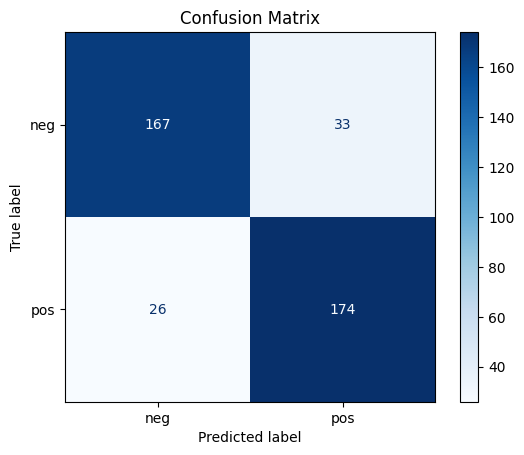

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test seti tahminleri
y_pred = clf.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Denenecek ayarlar
settings = [
    {"stop_words": None, "ngram_range": (1,1), "C":1.0},
    {"stop_words": "english", "ngram_range": (1,1), "C":1.0},
    {"stop_words": "english", "ngram_range": (1,2), "C":1.0},
    {"stop_words": "english", "ngram_range": (1,2), "C":2.0},
]

# Sonuçları sakla
results = []

for s in settings:
    pipe = Pipeline([
        ("tfidf", TfidfVectorizer(stop_words=s["stop_words"], ngram_range=s["ngram_range"])),
        ("clf", LogisticRegression(max_iter=1000, C=s["C"]))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((s, acc))

# Sonuçları yazdır
for s, acc in results:
    print(s, "=> acc=", round(acc, 4))


{'stop_words': None, 'ngram_range': (1, 1), 'C': 1.0} => acc= 0.8025
{'stop_words': 'english', 'ngram_range': (1, 1), 'C': 1.0} => acc= 0.82
{'stop_words': 'english', 'ngram_range': (1, 2), 'C': 1.0} => acc= 0.8075
{'stop_words': 'english', 'ngram_range': (1, 2), 'C': 2.0} => acc= 0.8075


In [37]:
import joblib

# En iyi model (stop_words='english', ngram_range=(1,1), C=1.0) olduğunu seçtik
joblib.dump(best_model, "sentiment_best_model.pkl")
joblib.dump(best_vectorizer, "tfidf_best_vectorizer.pkl")

print("✅ En iyi model ve vectorizer kaydedildi!")


NameError: name 'best_model' is not defined

In [38]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# En iyi ayarlarla vectorizer ve model oluştur
best_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,1))
X_train_vec = best_vectorizer.fit_transform(X_train)
X_test_vec  = best_vectorizer.transform(X_test)

best_model = LogisticRegression(C=1.0, max_iter=1000)
best_model.fit(X_train_vec, y_train)

# Kaydet
joblib.dump(best_model, "sentiment_best_model.pkl")
joblib.dump(best_vectorizer, "tfidf_best_vectorizer.pkl")

print("✅ En iyi model ve vectorizer kaydedildi!")


✅ En iyi model ve vectorizer kaydedildi!


In [39]:
import joblib

# Kaydedilmiş model ve vectorizer'ı yükle
loaded_model = joblib.load("sentiment_best_model.pkl")
loaded_vectorizer = joblib.load("tfidf_best_vectorizer.pkl")

# Örnek bir yorum tahmin et
sample = "I really loved this movie!"
sample_vec = loaded_vectorizer.transform([sample])
prediction = loaded_model.predict(sample_vec)
proba = loaded_model.predict_proba(sample_vec)

print("Tahmin:", prediction[0])
print("Olasılıklar:", proba)


Tahmin: neg
Olasılıklar: [[0.5165219 0.4834781]]


In [40]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Bigram + sublinear_tf + min_df/max_df + C=2.0 (daha önce en iyisi buydu)
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    ngram_range=(1, 2),
    max_features=20000,
    sublinear_tf=True,
    min_df=5,
    max_df=0.9,
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

model = LogisticRegression(solver="liblinear", max_iter=1000, C=2.0, random_state=42)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print("Accuracy (bigram model):", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

# Kaydet
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("✅ Bigram'lı final model kaydedildi.")


Accuracy (bigram model): 0.8525
              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

✅ Bigram'lı final model kaydedildi.


In [41]:
import numpy as np
import joblib

clf = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

def predict(text):
    v = tfidf.transform([text])
    proba = clf.predict_proba(v)[0]
    classes = list(clf.classes_)  # ['neg','pos']
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return clf.predict(v)[0], p_pos, p_neg

print(predict("I really loved this movie!"))
print(predict("I hate it"))
print(predict("absolutely terrible"))
print(predict("not good"))
print(predict("not bad"))


('pos', 0.5279, 0.4721)
('neg', 0.4763, 0.5237)
('neg', 0.2303, 0.7697)
('pos', 0.5828, 0.4172)
('neg', 0.0278, 0.9722)


In [42]:
def predict_with_threshold(text, pos_threshold=0.55):
    label, p_pos, p_neg = predict(text)
    return ("pos" if p_pos >= pos_threshold else "neg"), p_pos, p_neg


In [43]:
y_pred = model.predict(X_test_vec)
print("Accuracy (bigram model):", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))


Accuracy (bigram model): 0.8525
              precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [44]:
print(predict("I really loved this movie!"))


('pos', 0.5279, 0.4721)


In [45]:
import joblib

# Eğitimini az önce yaptığın en iyi model ve vectorizer değişkenleri:
# model  -> LogisticRegression(...)
# vectorizer -> TfidfVectorizer(...)

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Kaydedildi: sentiment_model.pkl, tfidf_vectorizer.pkl")


✅ Kaydedildi: sentiment_model.pkl, tfidf_vectorizer.pkl


In [46]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

clf  = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

# Aynı test setiyle kontrol (X_test metinlerden oluşuyor)
X_test_vec_loaded = tfidf.transform(X_test)
pred_loaded = clf.predict(X_test_vec_loaded)

print("Reload accuracy:", round(accuracy_score(y_test, pred_loaded), 4))
print("\nReload report:\n", classification_report(y_test, pred_loaded))


Reload accuracy: 0.8525

Reload report:
               precision    recall  f1-score   support

         neg       0.87      0.83      0.85       200
         pos       0.84      0.88      0.86       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [47]:
import numpy as np

def predict(text: str):
    v = tfidf.transform([text])
    proba = clf.predict_proba(v)[0]
    classes = list(clf.classes_)  # ['neg','pos']
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    return clf.predict(v)[0], p_pos, p_neg

print(predict("I really loved this movie!"))
print(predict("I hate it"))


('pos', 0.5279, 0.4721)
('neg', 0.4763, 0.5237)


In [48]:
import numpy as np
import joblib
import gradio as gr

# 1) Kaydedilmiş dosyaları yükle
clf  = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
classes = list(clf.classes_)  # ['neg','pos']

# (İsteğe bağlı) biraz daha temkinli pozitif eşiği
POS_THRESHOLD = 0.55

def predict_sentiment(text: str):
    vec = tfidf.transform([text])
    proba = clf.predict_proba(vec)[0]
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    # Eşikli çıktı (kararsız pozitifleri azaltır)
    label = "pos" if p_pos >= POS_THRESHOLD else "neg"
    return f"Tahmin: {label.upper()}  |  pos={p_pos}  neg={p_neg}"

demo = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Film yorumu gir", placeholder="I absolutely loved this movie!"),
    outputs=gr.Textbox(label="Sonuç"),
    title="Sentiment Demo (Saved Model)",
    description=f"TF-IDF + Logistic Regression | POS threshold = {POS_THRESHOLD}"
)

demo.launch()  # Gerekirse: demo.launch(server_port=7861)


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [49]:
import numpy as np, joblib, gradio as gr
clf  = joblib.load("sentiment_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
classes = list(clf.classes_)
POS_THRESHOLD = 0.55

def predict(text):
    v = tfidf.transform([text])
    proba = clf.predict_proba(v)[0]
    p_neg = float(np.round(proba[classes.index('neg')], 4))
    p_pos = float(np.round(proba[classes.index('pos')], 4))
    label = "pos" if p_pos >= POS_THRESHOLD else "neg"
    return f"{label.upper()} (pos={p_pos}, neg={p_neg})"

gr.Interface(predict, gr.Textbox(label="Film yorumu"), gr.Textbox(label="Sonuç"),
             title="Sentiment Demo").launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
